# Information Retrieval

In [1]:
import ParserCACM
import TextRepresenter
import indexation
import modeles
from query import QueryParserCACM
import evaluation
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import operator
# Auto reload the imported modules when running cells
%load_ext autoreload 
%autoreload 2

""" Some info to remember when testing:
- Query 10 is about parallel computation
- Doc 46 is about parallelism too
"""

# Constants:
srcFolder = "cacm" 
srcFile = "cacm.txt"
qryFile = "cacm.qry"
relFile = "cacm.rel"
gendata = "gendata" #output folder
indexName = "cacm"
docId = 46
queryId = np.random.randint(1,60)
wordTest = "logic"

cacm_txt = os.path.join(srcFolder, srcFile)
cacm_qry = os.path.join(srcFolder, qryFile)
cacm_rel = os.path.join(srcFolder, relFile)

## Testing the indexation:

In [2]:
# Construct the index:
idx = indexation.Index(indexName, gendata)
stemmer = TextRepresenter.PorterStemmer()
idx.indexation(cacm_txt, ParserCACM.ParserCACM(), stemmer)

Performing the indexation...
1st pass: build the index...
2nd pass: build the inverted index...
Finished.


In [3]:
print("\n###### Testing the index: ###### ")
print("Retrieve common stems in doc %d:" % docId)
stems = sorted(idx.getTfsForDoc(docId).items(), key=operator.itemgetter(1), reverse=True)
print([stem for stem, freq in stems[:10]])
print("""Should look like
> “The tendency towards increased parallelism in
> computers is noted.  Exploitation of this parallelism
> presents a number of new problems in machine design
> and in programming systems...”""")

print("\nRetrieve docs that contains 'logic'")
docs = idx.getTfsForStem("logic") 
print(docs)
print("Should include doc 63 and 46:", (63 in docs.keys() and 46 in docs.keys()))


###### Testing the index: ###### 
Retrieve common stems in doc 46:
['program', 'problem', 'programm', 'requir', 'parallel', 'stretch', 'logic', 'combin', 'scalzi', 'increas']
Should look like
> “The tendency towards increased parallelism in
> computers is noted.  Exploitation of this parallelism
> presents a number of new problems in machine design
> and in programming systems...”

Retrieve docs that contains 'logic'
{2817: 1, 3154: 6, 1030: 1, 2568: 1, 2313: 2, 3082: 1, 2060: 1, 2322: 1, 2067: 1, 22: 1, 2845: 1, 30: 1, 2848: 3, 2851: 1, 2054: 1, 3111: 1, 1834: 1, 1324: 1, 46: 2, 1327: 1, 2952: 1, 2871: 4, 3133: 5, 63: 2, 320: 8, 1602: 2, 2230: 1, 2888: 1, 3147: 1, 1101: 1, 2127: 2, 850: 1, 595: 2, 753: 1, 2145: 1, 2146: 2, 1381: 1, 2406: 3, 1383: 2, 1103: 1, 2931: 5, 1908: 1, 1398: 1, 3194: 1, 1916: 1, 2943: 1, 1155: 2, 1462: 1, 1928: 4, 1677: 1, 1718: 1, 1170: 1, 1173: 1, 2209: 1, 1700: 1, 2726: 3, 679: 2, 1195: 1, 1965: 1, 1456: 1, 2227: 1, 2484: 1, 1974: 6, 1208: 1, 1465: 1, 3008:

In [5]:
# Choosing what to test:
test_binaryweighter = True
test_tfidfweighter = True
test_queryparser = True
test_PRrecallmeasure = True
test_averageprecision = True
test_eval_ir_model = True
test_unigram_model = True
test_okapi = True
gridsearch_language = False

## Testing the weighters:

In [6]:
query = stemmer.getTextRepresentation(" Parallel languages; languages for parallel computation")

if test_binaryweighter:
    print("\n#####Testing BinaryWeighter: #####")

    bw = modeles.BinaryWeighter(idx)
    print("bw.getDocWeightsForDoc(",docId,"):", 
        bw.getDocWeightsForDoc(docId))
    print("\nbw.getDocWeightsForStem('"+wordTest+"'):", 
        bw.getDocWeightsForStem(wordTest))
    print("\nbw.getWeightsForQuery(' Parallel languages; languages for parallel computation'):", 
        bw.getWeightsForQuery(query))

    print("\n#####Testing Vectoriel with BinaryWeighter: #####")
    vect = modeles.Vectoriel(idx, bw)
    print("Top 10 documents for the previous query:")
    print("""Should include some of the following docs: 1043, 1188, 1306, 
    1358, 1396, 1491, 1923, 2246, 2316, 2527, 2699, 2710, 2715, 2716, 
    2906, 2923, 2956, 3073, 3150, """)
    print(vect.getRanking(query)[:10])
else:
    print("\n##### Skipping the test of BinaryWeighter #####")
    


#####Testing BinaryWeighter: #####
bw.getDocWeightsForDoc( 46 ): {'combin': 1, 'scalzi': 1, 'requir': 2, 'increas': 1, 'comput': 1, 'describ': 1, 'parallel': 2, 'number': 1, 'machin': 1, 'stretch': 2, 'logic': 2, 'program': 4, 'met': 1, 'consider': 1, 'discuss': 1, 'mcdonough': 1, 'problem': 3, 'carefulli': 1, 'exploit': 1, 'execut': 1, 'codd': 1, 'design': 1, 'balanc': 1, 'independ': 1, 'supervisori': 1, 'success': 1, 'note': 1, 'burden': 1, 'minimum': 1, 'multiprogramm': 1, 'techniqu': 1, 'lowri': 1, 'present': 1, 'programm': 3, 'tendenc': 1, 'system': 1, 'compil': 1, 'concurr': 1, 'place': 1, 'feasibl': 1, 'built': 1}

bw.getDocWeightsForStem('logic'): {2817: 1, 3154: 6, 1030: 1, 2568: 1, 2313: 2, 3082: 1, 2060: 1, 2322: 1, 2067: 1, 22: 1, 2845: 1, 30: 1, 2848: 3, 2851: 1, 2054: 1, 3111: 1, 1834: 1, 1324: 1, 46: 2, 1327: 1, 2952: 1, 2871: 4, 3133: 5, 63: 2, 320: 8, 1602: 2, 2230: 1, 2888: 1, 3147: 1, 1101: 1, 2127: 2, 850: 1, 595: 2, 753: 1, 2145: 1, 2146: 2, 1381: 1, 2406: 3, 1383

In [7]:
tfidfWeighter = modeles.TfidfWeighter(idx)
vect = modeles.Vectoriel(idx, tfidfWeighter)

if test_tfidfweighter:
    print("\n###### Testing TfidfWeighter: ###### ")
    print("tfidfWeighter.getDocWeightsForDoc(", docId, "):",
         tfidfWeighter.getDocWeightsForDoc(docId))
    print("\ntfidfWeighter.getDocWeightsForStem(\"logic\"):",
         tfidfWeighter.getDocWeightsForStem(wordTest))
    print("\ntfidfWeighter.getWeightsForQuery(query):",
         tfidfWeighter.getWeightsForQuery(query))
    print("\n###### Testing Vectoriel with TfidfWeighter: ###### ")
    print("Top 10 documents for the query:")
    print(vect.getRanking(query)[:10])
else:
    print("\n##### Skipping the test of TfidfWeighter #####")


###### Testing TfidfWeighter: ###### 
tfidfWeighter.getDocWeightsForDoc( 46 ): {'combin': 1, 'scalzi': 1, 'requir': 2, 'increas': 1, 'comput': 1, 'describ': 1, 'parallel': 2, 'number': 1, 'machin': 1, 'stretch': 2, 'logic': 2, 'program': 4, 'met': 1, 'consider': 1, 'discuss': 1, 'mcdonough': 1, 'problem': 3, 'carefulli': 1, 'exploit': 1, 'execut': 1, 'codd': 1, 'design': 1, 'balanc': 1, 'independ': 1, 'supervisori': 1, 'success': 1, 'note': 1, 'burden': 1, 'minimum': 1, 'multiprogramm': 1, 'techniqu': 1, 'lowri': 1, 'present': 1, 'programm': 3, 'tendenc': 1, 'system': 1, 'compil': 1, 'concurr': 1, 'place': 1, 'feasibl': 1, 'built': 1}

tfidfWeighter.getDocWeightsForStem("logic"): {2817: 1, 3154: 6, 1030: 1, 2568: 1, 2313: 2, 3082: 1, 2060: 1, 2322: 1, 2067: 1, 22: 1, 2845: 1, 30: 1, 2848: 3, 2851: 1, 2054: 1, 3111: 1, 1834: 1, 1324: 1, 46: 2, 1327: 1, 2952: 1, 2871: 4, 3133: 5, 63: 2, 320: 8, 1602: 2, 2230: 1, 2888: 1, 3147: 1, 1101: 1, 2127: 2, 850: 1, 595: 2, 753: 1, 2145: 1, 2146: 

## Testing the QueryParser

In [8]:
if test_queryparser:
    print("\n###### Testing QueryParserCACM: ###### ")
    qp = QueryParserCACM(cacm_qry, cacm_rel)
    query = qp.nextQuery()
    print("Searching for query #%d:" % queryId)
    while query is not None and query.getID() != str(queryId):
        #print(query)
        #print(20*'-')
        query = qp.nextQuery()

    print("Query:", query)
    queryTxt = stemmer.getTextRepresentation(query.getText())
    print("\nCompute scores:")
    scores = vect.getRanking(queryTxt)
    print(scores[:10])
    print("Done.")
else:
    print("\n##### Skipping the test of QueryParserCACM #####")


###### Testing QueryParserCACM: ###### 
Searching for query #23:
Query: Query {id=23, txt='Distributed computing structures and algorithms
', relevances=[2578, 2849, 3137, 3148]}

Compute scores:
[('2212', 0.66187411182159572), ('1778', 0.6445499241481405), ('1941', 0.6445499241481405), ('2276', 0.55692904651602604), ('1733', 0.54474411077874352), ('1944', 0.53221958347653509), ('2549', 0.52211346042399132), ('2914', 0.51903552939304787), ('2454', 0.43547355769445639), ('2649', 0.43524573482841261)]
Done.


## Testing precision/recall measure:



###### Testing evaluation.PrecisionRecallMeasure: ###### 
Searching for query # [7, 10, 25]
Query: Query {id=7, txt='I am interested in distributed algorithms - concurrent programs in
which processes communicate and synchronize by using message passing.
Areas of particular interest include fault-tolerance and techniques
for understanding the correctness of these algorithms.
', relevances=[1198, 1338, 1877, 1960, 2150, 2228, 2256, 2280, 2320, 2342, 2376, 2482, 2578, 2597, 2618, 2685, 2700, 2777, 2865, 2866, 2895, 2912, 2941, 3043, 3082, 3128, 3141, 3148]}
Retrieve scores...
CPU times: user 272 ms, sys: 36 ms, total: 308 ms
Wall time: 355 ms
Create PrecisionRecallMeasure object
Evaluate the scores.
This query has 28 relevant results
   i |found| precision | recall
    1|   1 | 1.000000  |0.035714
    2|   2 | 1.000000  |0.071429
    4|   3 | 0.750000  |0.107143
   12|   4 | 0.333333  |0.142857
   13|   5 | 0.384615  |0.178571
   19|   6 | 0.315789  |0.214286
   21|   7 | 0.333333  |0.25

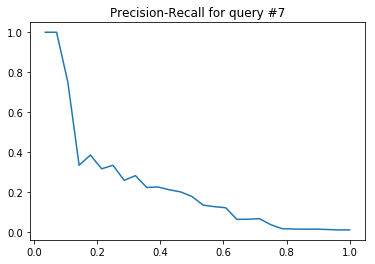

--------------------
Query: Query {id=10, txt='Parallel languages; languages for parallel computation
', relevances=[46, 141, 392, 950, 1158, 1198, 1262, 1380, 1471, 1601, 1613, 1747, 1795, 1811, 2060, 2150, 2256, 2289, 2342, 2376, 2433, 2618, 2664, 2685, 2700, 2714, 2777, 2785, 2851, 2895, 2896, 2912, 3039, 3075, 3156]}
Retrieve scores...
CPU times: user 252 ms, sys: 200 ms, total: 452 ms
Wall time: 394 ms
Create PrecisionRecallMeasure object
Evaluate the scores.
This query has 35 relevant results
   i |found| precision | recall
    1|   1 | 1.000000  |0.028571
    2|   2 | 1.000000  |0.057143
    3|   3 | 1.000000  |0.085714
    4|   4 | 1.000000  |0.114286
    5|   5 | 1.000000  |0.142857
    8|   6 | 0.750000  |0.171429
    9|   7 | 0.777778  |0.200000
   10|   8 | 0.800000  |0.228571
   11|   9 | 0.818182  |0.257143
   12|  10 | 0.833333  |0.285714
   13|  11 | 0.846154  |0.314286
   18|  12 | 0.666667  |0.342857
   19|  13 | 0.684211  |0.371429
   26|  14 | 0.538462  |0.400000
  

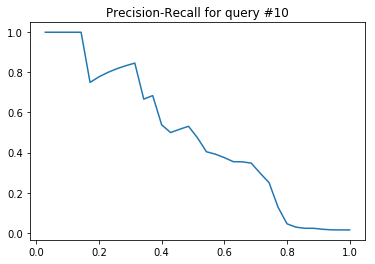

--------------------
Query: Query {id=25, txt='Performance evaluation and modelling of computer systems
', relevances=[268, 757, 963, 1408, 1518, 1526, 1533, 1572, 1653, 1698, 1719, 1805, 1892, 1901, 2085, 2095, 2218, 2277, 2318, 2319, 2358, 2373, 2434, 2452, 2535, 2582, 2667, 2668, 2669, 2681, 2741, 2765, 2798, 2818, 2831, 2859, 2862, 2863, 2881, 2918, 2928, 2984, 2988, 2996, 3006, 3048, 3059, 3067, 3088, 3089, 3119]}
Retrieve scores...
CPU times: user 248 ms, sys: 156 ms, total: 404 ms
Wall time: 387 ms
Create PrecisionRecallMeasure object
Evaluate the scores.
This query has 51 relevant results
   i |found| precision | recall
    1|   1 | 1.000000  |0.019608
    2|   2 | 1.000000  |0.039216
    4|   3 | 0.750000  |0.058824
    5|   4 | 0.800000  |0.078431
    6|   5 | 0.833333  |0.098039
    7|   6 | 0.857143  |0.117647
   11|   7 | 0.636364  |0.137255
   14|   8 | 0.571429  |0.156863
   16|   9 | 0.562500  |0.176471
   17|  10 | 0.588235  |0.196078
   18|  11 | 0.611111  |0.215686
 

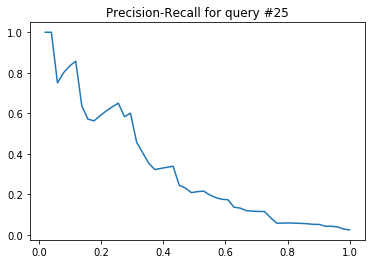

--------------------
Done.


In [9]:
if test_PRrecallmeasure:
    print("\n###### Testing evaluation.PrecisionRecallMeasure: ###### ")
    queryChosen = np.random.randint(1, 50, size=10)
    queryChosen =[7, 10, 25]#, 14, 26, 27, 42, 43] # lots of relevant results
    qp = QueryParserCACM(cacm_qry, cacm_rel)
    query = qp.nextQuery()
    print("Searching for query #", queryChosen)
    while query is not None :
        if int(query.getID()) in queryChosen:
            print("Query:", query)
            queryTxt = stemmer.getTextRepresentation(query.getText())
            print("Retrieve scores...")
            %time ranking = vect.getRanking(queryTxt)
            print("Create PrecisionRecallMeasure object")
            irlist = evaluation.IRList(query, ranking)
            precisRecall = evaluation.PrecisionRecallMeasure(irlist)
            print("Evaluate the scores.")
            pr = precisRecall.eval(verbose=True, nbLevel=100) # (recall, precision)
            precision = [p for r,p in pr]
            recall = [r for r,p in pr]
            plt.plot(recall, precision)
            plt.title("Precision-Recall for query #"+query.getID())
            plt.show()
            print(20*'-')


        query = qp.nextQuery()
    print("Done.")
else:
    print("\n##### Skipping the test of PrecisionRecallMeasure #####")

## Testing average precision:

In [10]:
if test_averageprecision:
    print("\n###### Testing evaluation.AveragePrecision: ###### ")
    queryChosen = np.random.randint(1, 50, size=10)
    #queryChosen =[7, 10, 14, 29]#, 25, 26, 27, 42, 43] # lots of relevant results
    qp = QueryParserCACM(cacm_qry, cacm_rel)
    query = qp.nextQuery()
    print("Searching for query #",queryChosen, "\n")
    while query is not None :
        if int(query.getID()) in queryChosen:
            print("Query:", query)
            queryTxt = stemmer.getTextRepresentation(query.getText())
            print("Retrieve scores...")
            scores = vect.getRanking(queryTxt)
            irlist = evaluation.IRList(query, scores)
            average_measure = evaluation.AveragePrecision(irlist)
            print("Evaluate the scores.")
            average_prec = average_measure.eval(verbose=True)
            print("Average precision: %f" % average_prec)
            print(20*'-')

        query = qp.nextQuery()
    print("Done.")
else:
    print("\n##### Skipping the test of AveragePrecision #####")


###### Testing evaluation.AveragePrecision: ###### 
Searching for query # [34 20 36  1 14 28 49 47  6 31] 

Query: Query {id=1, txt='What articles exist which deal with TSS (Time Sharing System), an
operating system for IBM computers?
', relevances=[1410, 1572, 1605, 2020, 2358]}
Retrieve scores...
Evaluate the scores.
This query has 5 relevant results
   i |found| precision
    6|   1 | 0.166667
    8|   2 | 0.250000
   39|   3 | 0.076923
   54|   4 | 0.074074
  697|   5 | 0.007174
Average precision: 0.114967
--------------------
Query: Query {id=6, txt='Interested in articles on robotics, motion planning particularly the
geometric and combinatorial aspects.  We are not interested in the
dynamics of arm motion.
', relevances=[1543, 2078, 2828]}
Retrieve scores...
Evaluate the scores.
This query has 3 relevant results
   i |found| precision
    4|   1 | 0.250000
    5|   2 | 0.400000
   44|   3 | 0.068182
Average precision: 0.239394
--------------------
Query: Query {id=14, txt='find 

## Testing EvalIRModel:

In [11]:
if test_eval_ir_model:
    print("\n###### Testing evaluation.EvalIRModel: ###### ")
    queryChosen = np.random.randint(1, 50, size=50)
    #queryChosen =[7, 10, 14]#, 25, 26, 27, 42, 43] # lots of relevant results
    queries = []
    qp = QueryParserCACM(cacm_qry, cacm_rel)
    query = qp.nextQuery()
    print("Searching for queries #",queryChosen, "...")
    while query is not None :
        if int(query.getID()) in queryChosen:
            queries.append(query)
        query = qp.nextQuery()
    print("Found queries")
    irmodels = {"vectoriel": modeles.Vectoriel(idx, tfidfWeighter)}
    measures = {"averagePrecision": evaluation.AveragePrecision}
    eval_model = evaluation.EvalIRModel(queries, irmodels, measures)
    print("Calling eval()...")
    print(eval_model.eval(verbose=False))
    print("Done.")
else:
    print("\n##### Skipping the test of EvalIRModel #####")


###### Testing evaluation.EvalIRModel: ###### 
Searching for queries # [31  9 48 38 19  5  4 48 26 16 10 32 24  5 36 32 43 35  3 15 24 26 16 17  1
  4 11 17 20 25  4 17 18  3 43 49  3 44 26  8 37 12 15  5  2  6  1 38 20 40] ...
Found queries
Calling eval()...
{('vectoriel', 'averagePrecision'): (0.24998283349746639, 0.18126309351043926)}
Done.


## Testing the unigram language model:

In [12]:
if test_unigram_model:
    print("\n###### Testing Unigram language: ###### ")
    queryChosen = np.random.randint(1, 50, size=3)
    #queryChosen =[7, 10, 14]#, 25, 26, 27, 42, 43] # lots of relevant results
    queries = []
    relevants = {} #dict of {query id : list of relevant doc id}
    qp = QueryParserCACM(cacm_qry, cacm_rel)
    query = qp.nextQuery()
    print("Searching for queries #",queryChosen, "...")
    while query is not None :
        if int(query.getID()) in queryChosen:
            queries.append(query)
            relevants[query.getID()] = list(query.getRelevants().keys())
            #print(query)
        query = qp.nextQuery()
    print("Found queries")
    model = modeles.UnigramLanguage(idx, 0.8)
    for q, (q_id, relev) in zip(queries, relevants.items()):
        print(q)
        print("Scores for 3 relevant docs:")
        for doc_id in np.random.choice(relev, size=3):
            print(doc_id, model.score(stemmer.getTextRepresentation(q.getText()), doc_id))
        print("Scores for 3 random docs:")
        for doc_id in np.random.choice(idx.getDocsID(), size=3):
            if doc_id in relev:
                print("Doc #", doc_id, "Relevant doc")
            else:
                stems = ','.join(idx.getTfsForDoc(doc_id).keys())
                print("Irrelevant doc #", doc_id, stems)
                print("Score for this doc:", 
                      model.score(stemmer.getTextRepresentation(q.getText()), doc_id))
        print(20*'-')
    print("Done.")
else:
    print("\n##### Skipping the test of LanguageModel #####")


###### Testing Unigram language: ###### 
Searching for queries # [20 32 27] ...
Found queries
Query {id=20, txt='Graph theoretic algorithms applicable to sparse matrices
', relevances=[1563, 2695, 2986]}
Scores for 3 relevant docs:
2734 -49.0061478006
1884 -46.7331820194
2596 -47.1205310933
Scores for 3 random docs:
Irrelevant doc # 3067 algorithm,comput,string,generaliz,entir,swapp,curv,set,procedur,minim,point,extend,function,satisfi,class,denn,size,model,gopt,simul,effici,includ,demand,work,usag,page,gw,referenc,empir,segment,inclus,slutz,vmin,behavior,case,retent,manag,measur,cost,memori,load,structur,actual,operat,exce,optim,polici,concept,defin,resid,refer,data,aggregat,program,retriev,databas,show,properti,fetch,special,stack,develop,allow
Score for this doc: -47.8300492736
Irrelevant doc # 2985 stage,comput,evid,categori,nolan,price,method,mark,involv,tenanc,conform,servic,edp,appli,import,assert,posit,environ,budget,level,system,train,attitud,high,advanc,control,prerequisit,b

##  Testing Okapi language model:

In [13]:
if test_okapi:
    print("\n###### Testing Okapi: ###### ")
    queryChosen = np.random.randint(1, 50, size=3)
    #queryChosen =[7, 10, 14]#, 25, 26, 27, 42, 43] # lots of relevant results
    queries = []
    relevants = {} #dict of {query id : list of relevant doc id}
    qp = QueryParserCACM(cacm_qry, cacm_rel)
    query = qp.nextQuery()
    print("Searching for queries #",queryChosen, "...")
    while query is not None :
        if int(query.getID()) in queryChosen:
            queries.append(query)
            relevants[query.getID()] = list(query.getRelevants().keys())
            #print(query)
        query = qp.nextQuery()
    print("Found queries")
    
    okapi = modeles.Okapi(idx, k=1, b=1)
    for q, (q_id, relev) in zip(queries, relevants.items()):
        print(q)
        print("Scores for 3 relevant docs:")
        for doc_id in np.random.choice(relev, size=3):
            stems = ','.join(idx.getTfsForDoc(doc_id).keys())
            print("Relevant doc #", doc_id, stems)
            print("Score:", 
                  okapi.score(stemmer.getTextRepresentation(q.getText()), doc_id, verbose=True))
        print("Scores for 3 random docs:")
        for doc_id in np.random.choice(idx.getDocsID(), size=3):
            if doc_id in relev:
                print("Doc #", doc_id, "Relevant doc")
            else:
                stems = ','.join(idx.getTfsForDoc(doc_id).keys())
                print("Irrelevant doc #", doc_id, stems)
                print("Score for this doc:", 
                      okapi.score(stemmer.getTextRepresentation(q.getText()), doc_id, verbose=True))
        print(20*'-')
    print("Done.")
else:
    print("\n##### Skipping the test of Okapi #####")


###### Testing Okapi: ###### 
Searching for queries # [16  5 39] ...
Found queries
Query {id=5, txt='I'd like papers on design and implementation of editing interfaces,
window-managers, command interpreters, etc.  The essential issues are
human interface design, with views on improvements to user efficiency,
effectiveness and satisfaction.
', relevances=[756, 1307, 1502, 2035, 2299, 2399, 2501, 2820]}
Scores for 3 relevant docs:
Relevant doc # 2378 occurr,cooperat,comput,describ,multiprogramm,memori,complicat,set,remaind,view,function,handl,event,develop,time,compound,devic,specifi,supervisor,advantag,detail,system,organiz,combin,supervisori,implement,file,action,paper,request,manag,schedul,small,outlin,discuss,operat,approach,concept,execut,error,softwar,share,independ,base,program,gain,directori,extern,primit,activ,process
Doc 2378 len= 73 meanLean= 35.59769038701623
weight for paper: 1.19896061939
weight for design: 0.0
weight for essenti: 0.0
weight for interfac: 0.0
weight for hu

In [14]:
print("\n###### Testing Okapi & AveragePrecision: ###### ")
for query in queries:
    print("Query:", query)
    queryTxt = stemmer.getTextRepresentation(query.getText())
    print("Retrieve scores...")
    scores = okapi.getRanking(queryTxt)
    irlist = evaluation.IRList(query, scores)
    average_measure = evaluation.AveragePrecision(irlist)
    print("Evaluate the scores.")
    average_prec = average_measure.eval(verbose=True)
    print("Average precision: %f" % average_prec)
    print(20*'-')

print("Done.")


###### Testing Okapi & AveragePrecision: ###### 
Query: Query {id=5, txt='I'd like papers on design and implementation of editing interfaces,
window-managers, command interpreters, etc.  The essential issues are
human interface design, with views on improvements to user efficiency,
effectiveness and satisfaction.
', relevances=[756, 1307, 1502, 2035, 2299, 2399, 2501, 2820]}
Retrieve scores...
Evaluate the scores.
This query has 8 relevant results
   i |found| precision
    2|   1 | 0.500000
    7|   2 | 0.285714
    8|   3 | 0.375000
   68|   4 | 0.058824
   71|   5 | 0.070423
   76|   6 | 0.078947
  114|   7 | 0.061404
  165|   8 | 0.048485
Average precision: 0.184850
--------------------
Query: Query {id=16, txt='find all descriptions of file handling in operating systems based on
multiple processes and message passing.
', relevances=[1746, 1749, 1828, 1854, 1960, 2070, 2114, 2342, 2376, 2378, 2500, 2632, 2817, 2912, 3073, 3105, 3148]}
Retrieve scores...
Evaluate the scores.
This q

## Comparison of language models:

In [15]:
from sklearn.model_selection import train_test_split
import itertools 

# Searching queries:
queries = []
qp = QueryParserCACM(cacm_qry, cacm_rel)
query = qp.nextQuery()
print("Searching for queries #",queryChosen, "...")
while query is not None :
    if int(query.getID()) in queryChosen:
        queries.append(query)
    query = qp.nextQuery()
print("Found all queries")

q_train, q_test = train_test_split(queries)

# Train models, find best parameters.

def dict_combinations(dic):
    keys = dic.keys()
    #print(keys)
    values = [dic[key] for key in keys]
    #print("values:", list(values), ".")
    #for combination in itertools.product(*values):
        #print(combination)
    combinations = [dict(zip(keys, combination)) for combination in itertools.product(*values)]
    return combinations

def gridsearch(model_class, param_grid, queries, measure_object, verbose=False):
    """
    :param model_class: modeles.Vectoriel for instance (the class, not an instance)
    :param param_grid: dict of {string:iterable}
    :param queries: list of Query objects
    :param measure_class: evaluation.AveragePrecision() for instance
    """
    params = []
    irmodels = {}
    for i, comb in enumerate(dict_combinations(param_grid)):
        params.append(comb)
        irmodels[i] = model_class(**comb)
    eval_models = evaluation.EvalIRModel(queries, irmodels, {'measure':measure_object})
    if verbose:
        print("Calling eval()")
        scores = eval_models.eval(verbose=verbose)
        for k,v in scores.items():
            print(params[k[0]])
            print("--->", v[0])
    else:
        scores = eval_models.eval()
    best_irmodel = max(scores.keys(), key=(lambda key: scores[key][0]))[0]
    return params[best_irmodel]

if gridsearch_language:
    unigram_params_grid = {'index':[idx], 'regularization':np.linspace(0,1, 20)}

    #c = dict_combinations(params_grid)
    #print("comb: ",c)

    best_unigram_params = gridsearch(modeles.UnigramLanguage, unigram_params_grid, 
                     q_train, evaluation.AveragePrecision, verbose=1)
else:
    best_unigram_params = {'index': idx, 'regularization': 0.36842105263157893}



Searching for queries # [16  5 39] ...
Found all queries


In [16]:
if gridsearch_language:
    okapi_params_grid = {'index':[idx], 'k':np.linspace(1, 2, 10), 'b':np.linspace(0,2,10)}
    best_okapi_params = gridsearch(modeles.Okapi, okapi_params_grid, 
                 q_train, evaluation.AveragePrecision, verbose=1)

else:
    best_okapi_params = {'index': idx, 'k': 2.0, 'b': 0.5}

### Execution on the test set:

In [17]:
print("best unigram params:", best_unigram_params)
print("best okapi params:", best_okapi_params)

irmodels = {'unigram':modeles.UnigramLanguage(**best_unigram_params),
            'okapi':modeles.Okapi(**best_okapi_params)}

eval_models = evaluation.EvalIRModel(q_test, irmodels, {'measure':evaluation.AveragePrecision})
scores = eval_models.eval(verbose=True)
print(scores)

best unigram params: {'index': <indexation.Index object at 0x7f70e0451be0>, 'regularization': 0.3684210526315789}
best okapi params: {'index': <indexation.Index object at 0x7f70e0451be0>, 'b': 0.5, 'k': 2.0}
IRModel: okapi
Measure: measure
(0.32123142312358555, 0.0)
IRModel: unigram
Measure: measure
(0.35455034709164207, 0.0)
{('okapi', 'measure'): (0.32123142312358555, 0.0), ('unigram', 'measure'): (0.35455034709164207, 0.0)}


## PageRank

In [24]:
import graphes

print("Links from the 1st article:", sorted(idx.getSuccNodes('1')))
print("(Should be [43, 53, 91, ..., 1883, 1982, 3184])")
print("\nLinks from the 2nd article:", idx.getSuccNodes('2'))
print("(Should be empty)")

print("\nLinks to the 1st article:", sorted(idx.getPrevNodes('1')))
print("(Should be [43, 53, 91, ..., 1883, 1982, 3184])")
print("\nLinks to the 43rd article:", sorted(idx.getPrevNodes('43')))
print("(Should be [1, 205])")

Links from the 1st article: [43, 53, 91, 100, 123, 164, 165, 196, 205, 210, 214, 324, 398, 410, 642, 669, 1273, 1883, 1982, 3184]
(Should be [43, 53, 91, ..., 1883, 1982, 3184])

Links from the 2nd article: []
(Should be empty)

Links to the 1st article: [43, 53, 91, 100, 123, 164, 165, 196, 205, 210, 214, 324, 398, 410, 642, 669, 1273, 1883, 1982, 3184]
(Should be [43, 53, 91, ..., 1883, 1982, 3184])

Links to the 43rd article: [1, 205]
(Should be [1, 205])


In [33]:

pagerank = graphes.PageRank(idx, ["1", "43"], 5)
print(pagerank.getGraph().nonzero())
d = pagerank.solve()
print(d)
print(sorted(d.keys(), key=(lambda key: d[key]), reverse=True))

(array([ 323,  204,  204,   99,    0,    0,   99,  204, 1981, 3183,   42,
          0, 1981, 1981,    0,  204,   99, 1981,    0,  204,    0, 1981,
       1981,  641,    0,  641, 3183,  641,    0, 1981, 1981,   99,  323,
        204, 1981,  641, 1981,  204,   99,    0,   99, 1981,  204, 3183,
        641,   99,  641,  204,    0,    0,  641,    0,  641,  323,  204,
       3183,  204,   42,  641,   99, 3183,    0,    0, 3183,  641,    0,
          0,   99, 3183,   99,    0,  204,    0,  204,  323,    0, 1981,
       1981,  641,    0,  204, 3183], dtype=int32), array([1272,  213, 3183,  204,  122,  195,  163,    0,  323,    0,  204,
        204,  641,  204,  164,   42,  122, 1882,  323,  163,  668,  209,
        668,   99,   90,  204,  409,  122, 1981,  213,    0,  213,    0,
        209,  397,  668,   99, 1981,  668,   99,  209,  122,  195,  204,
        213,  641,  195,  641, 3183,  409,  397, 1272,  209, 1981,  409,
        397,  122,    0,    0, 1981,  122, 1882,  641,  668,  163,  213